In [0]:
!pip install --upgrade pip
!apt-get-y install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user
!apt update
!apt install gcc python-dev libkrb5-dev -y

from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F
import pyspark.sql
from pyspark.sql.functions import col,udf,regexp_replace,isnull,isnan,when,count,round,avg,coalesce,create_map,lit,expr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from itertools import chain
import pandas as pd
import numpy as np
import os
import seaborn as sns
import pyspark
from pyspark.ml.feature import VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression as lr
from pyspark.ml.feature import PCA
from pyspark.ml.clustering import KMeans
from mpl_toolkits.mplot3d import Axes3D

spark = SparkSession.builder.appName('BDA').getOrCreate()
spark.sparkContext.setLogLevel('INFO')
os.environ['SPARK_HOME'] = "/content/spark-3.0.1-bin-hadoop3.2" 

Collecting pip
 Downloading pip-21.0.1-py3-none-any.whl (1.5 MB)
▏ | 10 kB 17.2 MB/s eta 0:00:01 |▍ | 20 kB 13.0 MB/s eta 0:00:01 |▋ | 30 kB 7.0 MB/s eta 0:00:01 |▉ | 40 kB 6.5 MB/s eta 0:00:01 |█ | 51 kB 7.2 MB/s eta 0:00:01 |█▎ | 61 kB 7.1 MB/s eta 0:00:01 |█▌ | 71 kB 5.8 MB/s eta 0:00:01 |█▊ | 81 kB 6.4 MB/s eta 0:00:01 |██ | 92 kB 7.0 MB/s eta 0:00:01 |██▏ | 102 kB 6.8 MB/s eta 0:00:01 |██▍ | 112 kB 6.8 MB/s eta 0:00:01 |██▌ | 122 kB 6.8 MB/s eta 0:00:01 |██▊ | 133 kB 6.8 MB/s eta 0:00:01 |███ | 143 kB 6.8 MB/s eta 0:00:01 |███▏ | 153 kB 6.8 MB/s eta 0:00:01 |███▍ | 163 kB 6.8 MB/s eta 0:00:01 |███▋ | 174 kB 6.8 MB/s eta 0:00:01 |███▉ | 184 kB 6.8 MB/s eta 0:00:01 |████ | 194 kB 6.8 MB/s eta 0:00:01 |████▎ | 204 kB 6.8 MB/s eta 0:00:01 |████▌ | 215 kB 6.8 MB/s eta 0:00:01 |████▊ | 225 kB 6.8 MB/s eta 0:00:01 |█████ | 235 kB 6.8 MB/s eta 0:00:01 |█████ | 245 kB 6.8 MB/s eta 0:00:01 |█████▎ | 256 kB 6.8 MB/s eta 0:00:01 |█████▌ | 266 kB 6.8 MB/s eta 0:00:01 |█████▊ | 276 kB 6.8 MB/s eta 0:00:01 |██████ | 286 kB 6.8 MB/s eta 0:00:01 |██████▏ | 296 kB 6.8 MB/s eta 0:00:01 |██████▍ | 307 kB 6.8 MB/s eta 0:00:01 |██████▋ | 317 kB 6.8 MB/s eta 0:00:01 |██████▉ | 327 kB 6.8 MB/s eta 0:00:01 |███████ | 337 kB 6.8 MB/s eta 0:00:01 |███████▎ | 348 kB 6.8 MB/s eta 0:00:01 |███████▌ | 358 kB 6.8 MB/s eta 0:00:01 |███████▋ | 368 kB 6.8 MB/s eta 0:00:01 |███████▉ | 378 kB 6.8 MB/s eta 0:00:01 |████████ | 389 kB 6.8 MB/s eta 0:00:01 |████████▎ | 399 kB 6.8 MB/s eta 0:00:01 |████████▌ | 409 kB 6.8 MB/s eta 0:00:01 |████████▊ | 419 kB 6.8 MB/s eta 0:00:01 |█████████ | 430 kB 6.8 MB/s eta 0:00:01 |█████████▏ | 440 kB 6.8 MB/s eta 0:00:01 |█████████▍ | 450 kB 6.8 MB/s eta 0:00:01 |█████████▋ | 460 kB 6.8 MB/s eta 0:00:01 |█████████▉ | 471 kB 6.8 MB/s eta 0:00:01 |██████████ | 481 kB 6.8 MB/s eta 0:00:01 |██████████▏ | 491 kB 6.8 MB/s eta 0:00:01 |██████████▍ | 501 kB 6.8 MB/s eta 0:00:01 |██████████▋ | 512 kB 6.8 MB/s eta 0:00:01 |██████████▉ | 522 kB 6.8 MB/s eta 0:00:01 |███████████ | 532 kB 6.8 MB/s eta 0:00:01 |███████████▎ | 542 kB 6.8 MB/s eta 0:00:01 |███████████▌ | 552 kB 6.8 MB/s eta 0:00:01 |███████████▊ | 563 kB 6.8 MB/s eta 0:00:01 |████████████ | 573 kB 6.8 MB/s eta 0:00:01 |████████████▏ | 583 kB 6.8 MB/s eta 0:00:01 |████████████▍ | 593 kB 6.8 MB/s eta 0:00:01 |████████████▋ | 604 kB 6.8 MB/s eta 0:00:01 |████████████▊ | 614 kB 6.8 MB/s eta 0:00:01 |█████████████ | 624 kB 6.8 MB/s eta 0:00:01 |█████████████▏ | 634 kB 6.8 MB/s eta 0:00:01 |█████████████▍ | 645 kB 6.8 MB/s eta 0:00:01 |█████████████▋ | 655 kB 6.8 MB/s eta 0:00:01 |█████████████▉ | 665 kB 6.8 MB/s eta 0:00:01 |██████████████ | 675 kB 6.8 MB/s eta 0:00:01 |██████████████▎ | 686 kB 6.8 MB/s eta 0:00:01 |██████████████▌ | 696 kB 6.8 MB/s eta 0:00:01 |██████████████▊ | 706 kB 6.8 MB/s eta 0:00:01 |███████████████ | 716 kB 6.8 MB/s eta 0:00:01 |███████████████▏ | 727 kB 6.8 MB/s eta 0:00:01 |███████████████▎ | 737 kB 6.8 MB/s eta 0:00:01 |███████████████▌ | 747 kB 6.8 MB/s eta 0:00:01 |███████████████▊ | 757 kB 6.8 MB/s eta 0:00:01 |████████████████ | 768 kB 6.8 MB/s eta 0:00:01 |████████████████▏ | 778 kB 6.8 MB/s eta 0:00:01 |████████████████▍ | 788 kB 6.8 MB/s eta 0:00:01 |████████████████▋ | 798 kB 6.8 MB/s eta 0:00:01 |████████████████▉ | 808 kB 6.8 MB/s eta 0:00:01 |█████████████████ | 819 kB 6.8 MB/s eta 0:00:01 |█████████████████▎ | 829 kB 6.8 MB/s eta 0:00:01 |█████████████████▌ | 839 kB 6.8 MB/s eta 0:00:01 |█████████████████▊ | 849 kB 6.8 MB/s eta 0:00:01 |█████████████████▉ | 860 kB 6.8 MB/s eta 0:00:01 |██████████████████ | 870 kB 6.8 MB/s eta 0:00:01 |██████████████████▎ | 880 kB 6.8 MB/s eta 0:00:01 |██████████████████▌ | 890 kB 6.8 MB/s eta 0:00:01 |██████████████████▊ | 901 kB 6.8 MB/s eta 0:00:01 |███████████████████ | 911 kB 6.8 MB/s eta 0:00:01 |███████████████████▏ | 921 kB 6.8 MB/s eta 0:00:01 |███████████████████▍ | 931 kB 6.8 MB/s eta 0:00:01 |██████████

In [0]:
fsdf = spark.read.format("csv").option("header", "True").option("sep", "\t").load("/FileStore/tables/en_openfoodfacts_org_products.tsv")
fsdf.createOrReplaceTempView('fsds_tmp')
fsdf.cache()

Out[2]: DataFrame[code: string, url: string, creator: string, created_t: string, created_datetime: string, last_modified_t: string, last_modified_datetime: string, product_name: string, generic_name: string, quantity: string, packaging: string, packaging_tags: string, brands: string, brands_tags: string, categories: string, categories_tags: string, categories_en: string, origins: string, origins_tags: string, manufacturing_places: string, manufacturing_places_tags: string, labels: string, labels_tags: string, labels_en: string, emb_codes: string, emb_codes_tags: string, first_packaging_code_geo: string, cities: string, cities_tags: string, purchase_places: string, stores: string, countries: string, countries_tags: string, countries_en: string, ingredients_text: string, allergens: string, allergens_en: string, traces: string, traces_tags: string, traces_en: string, serving_size: string, no_nutriments: string, additives_n: string, additives: string, additives_tags: string, additives_en: string, ingredients_from_palm_oil_n: string, ingredients_from_palm_oil: string, ingredients_from_palm_oil_tags: string, ingredients_that_may_be_from_palm_oil_n: string, ingredients_that_may_be_from_palm_oil: string, ingredients_that_may_be_from_palm_oil_tags: string, nutrition_grade_uk: string, nutrition_grade_fr: string, pnns_groups_1: string, pnns_groups_2: string, states: string, states_tags: string, states_en: string, main_category: string, main_category_en: string, image_url: string, image_small_url: string, energy_100g: string, energy-from-fat_100g: string, fat_100g: string, saturated-fat_100g: string, -butyric-acid_100g: string, -caproic-acid_100g: string, -caprylic-acid_100g: string, -capric-acid_100g: string, -lauric-acid_100g: string, -myristic-acid_100g: string, -palmitic-acid_100g: string, -stearic-acid_100g: string, -arachidic-acid_100g: string, -behenic-acid_100g: string, -lignoceric-acid_100g: string, -cerotic-acid_100g: string, -montanic-acid_100g: string, -melissic-acid_100g: string, monounsaturated-fat_100g: string, polyunsaturated-fat_100g: string, omega-3-fat_100g: string, -alpha-linolenic-acid_100g: string, -eicosapentaenoic-acid_100g: string, -docosahexaenoic-acid_100g: string, omega-6-fat_100g: string, -linoleic-acid_100g: string, -arachidonic-acid_100g: string, -gamma-linolenic-acid_100g: string, -dihomo-gamma-linolenic-acid_100g: string, omega-9-fat_100g: string, -oleic-acid_100g: string, -elaidic-acid_100g: string, -gondoic-acid_100g: string, -mead-acid_100g: string, -erucic-acid_100g: string, -nervonic-acid_100g: string, trans-fat_100g: string, cholesterol_100g: string, carbohydrates_100g: string, sugars_100g: string, -sucrose_100g: string, -glucose_100g: string, -fructose_100g: string, -lactose_100g: string, -maltose_100g: string, -maltodextrins_100g: string, starch_100g: string, polyols_100g: string, fiber_100g: string, proteins_100g: string, casein_100g: string, serum-proteins_100g: string, nucleotides_100g: string, salt_100g: string, sodium_100g: string, alcohol_100g: string, vitamin-a_100g: string, beta-carotene_100g: string, vitamin-d_100g: string, vitamin-e_100g: string, vitamin-k_100g: string, vitamin-c_100g: string, vitamin-b1_100g: string, vitamin-b2_100g: string, vitamin-pp_100g: string, vitamin-b6_100g: string, vitamin-b9_100g: string, folates_100g: string, vitamin-b12_100g: string, biotin_100g: string, pantothenic-acid_100g: string, silica_100g: string, bicarbonate_100g: string, potassium_100g: string, chloride_100g: string, calcium_100g: string, phosphorus_100g: string, iron_100g: string, magnesium_100g: string, zinc_100g: string, copper_100g: string, manganese_100g: string, fluoride_100g: string, selenium_100g: string, chromium_100g: string, molybdenum_100g: string, iodine_100g: string, caffeine_100g: string, taurine_100g: string, ph_100g: string, fruits-vegetables-nuts_100g: string, fruits-vegetables-nuts-estimate_100g: string, collagen-meat-protein-ratio_100g: string, cocoa_100g: string, chlorophyl_100g

In [0]:
display(fsdf)

code url creator created_t created_datetime last_modified_t last_modified_datetime product_name generic_name quantity packaging packaging_tags brands brands_tags categories categories_tags categories_en origins origins_tags manufacturing_places manufacturing_places_tags labels labels_tags labels_en emb_codes emb_codes_tags first_packaging_code_geo cities cities_tags purchase_places stores countries countries_tags countries_en ingredients_text allergens allergens_en traces traces_tags traces_en serving_size no_nutriments additives_n additives additives_tags additives_en ingredients_from_palm_oil_n ingredients_from_palm_oil ingredients_from_palm_oil_tags ingredients_that_may_be_from_palm_oil_n ingredients_that_may_be_from_palm_oil ingredients_that_may_be_from_palm_oil_tags nutrition_grade_uk nutrition_grade_fr pnns_groups_1 pnns_groups_2 states states_tags states_en main_category main_category_en image_url image_small_url energy_100g energy-from-fat_100g fat_100g saturated-fat_100g -butyric-acid_100g -caproic-acid_100g -caprylic-acid_100g -capric-acid_100g -lauric-acid_100g -myristic-acid_100g -palmitic-acid_100g -stearic-acid_100g -arachidic-acid_100g -behenic-acid_100g -lignoceric-acid_100g -cerotic-acid_100g -montanic-acid_100g -melissic-acid_100g monounsaturated-fat_100g polyunsaturated-fat_100g omega-3-fat_100g -alpha-linolenic-acid_100g -eicosapentaenoic-acid_100g -docosahexaenoic-acid_100g omega-6-fat_100g -linoleic-acid_100g -arachidonic-acid_100g -gamma-linolenic-acid_100g -dihomo-gamma-linolenic-acid_100g omega-9-fat_100g -oleic-acid_100g -elaidic-acid_100g -gondoic-acid_100g -mead-acid_100g -erucic-acid_100g -nervonic-acid_100g trans-fat_100g cholesterol_100g carbohydrates_100g sugars_100g -sucrose_100g -glucose_100g -fructose_100g -lactose_100g -maltose_100g -maltodextrins_100g starch_100g polyols_100g fiber_100g proteins_100g casein_100g serum-proteins_100g nucleotides_100g salt_100g sodium_100g alcohol_100g vitamin-a_100g beta-carotene_100g vitamin-d_100g vitamin-e_100g vitamin-k_100g vitamin-c_100g vitamin-b1_100g vitamin-b2_100g vitamin-pp_100g vitamin-b6_100g vitamin-b9_100g folates_100g vitamin-b12_100g biotin_100g pantothenic-acid_100g silica_100g bicarbonate_100g potassium_100g chloride_100g calcium_100g phosphorus_100g iron_100g magnesium_100g zinc_100g copper_100g manganese_100g fluoride_100g selenium_100g chromium_100g molybdenum_100g iodine_100g caffeine_100g taurine_100g ph_100g fruits-vegetables-nuts_100g fruits-vegetables-nuts-estimate_100g collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g glycemic-index_100g water-hardness_100g 0000000003087 http://world-en.openfoodfacts.org/product/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao openfoodfacts-contributors 1474103866 2016-09-17T09:17:46Z 1474103893 2016-09-17T09:18:13Z Farine de blé noir null 1kg null null Ferme t'y R'nao ferme-t-y-r-nao null null null null null null null null null null null null null null null null null en:FR en:france France null null null null null null null null null null null null null null null null null null null null null null en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Characteristics to be completed,Categories to be completed,Bran

In [0]:
fsdf.printSchema()

root
-- code: string (nullable = true)
-- url: string (nullable = true)
-- creator: string (nullable = true)
-- created_t: string (nullable = true)
-- created_datetime: string (nullable = true)
-- last_modified_t: string (nullable = true)
-- last_modified_datetime: string (nullable = true)
-- product_name: string (nullable = true)
-- generic_name: string (nullable = true)
-- quantity: string (nullable = true)
-- packaging: string (nullable = true)
-- packaging_tags: string (nullable = true)
-- brands: string (nullable = true)
-- brands_tags: string (nullable = true)
-- categories: string (nullable = true)
-- categories_tags: string (nullable = true)
-- categories_en: string (nullable = true)
-- origins: string (nullable = true)
-- origins_tags: string (nullable = true)
-- manufacturing_places: string (nullable = true)
-- manufacturing_places_tags: string (nullable = true)
-- labels: string (nullable = true)
-- labels_tags: string (nullable = true)
-- labels_en: string (nullable = true)
-- emb_codes: string (nullable = true)
-- emb_codes_tags: string (nullable = true)
-- first_packaging_code_geo: string (nullable = true)
-- cities: string (nullable = true)
-- cities_tags: string (nullable = true)
-- purchase_places: string (nullable = true)
-- stores: string (nullable = true)
-- countries: string (nullable = true)
-- countries_tags: string (nullable = true)
-- countries_en: string (nullable = true)
-- ingredients_text: string (nullable = true)
-- allergens: string (nullable = true)
-- allergens_en: string (nullable = true)
-- traces: string (nullable = true)
-- traces_tags: string (nullable = true)
-- traces_en: string (nullable = true)
-- serving_size: string (nullable = true)
-- no_nutriments: string (nullable = true)
-- additives_n: string (nullable = true)
-- additives: string (nullable = true)
-- additives_tags: string (nullable = true)
-- additives_en: string (nullable = true)
-- ingredients_from_palm_oil_n: string (nullable = true)
-- ingredients_from_palm_oil: string (nullable = true)
-- ingredients_from_palm_oil_tags: string (nullable = true)
-- ingredients_that_may_be_from_palm_oil_n: string (nullable = true)
-- ingredients_that_may_be_from_palm_oil: string (nullable = true)
-- ingredients_that_may_be_from_palm_oil_tags: string (nullable = true)
-- nutrition_grade_uk: string (nullable = true)
-- nutrition_grade_fr: string (nullable = true)
-- pnns_groups_1: string (nullable = true)
-- pnns_groups_2: string (nullable = true)
-- states: string (nullable = true)
-- states_tags: string (nullable = true)
-- states_en: string (nullable = true)
-- main_category: string (nullable = true)
-- main_category_en: string (nullable = true)
-- image_url: string (nullable = true)
-- image_small_url: string (nullable = true)
-- energy_100g: string (nullable = true)
-- energy-from-fat_100g: string (nullable = true)
-- fat_100g: string (nullable = true)
-- saturated-fat_100g: string (nullable = true)
-- -butyric-acid_100g: string (nullable = true)
-- -caproic-acid_100g: string (nullable = true)
-- -caprylic-acid_100g: string (nullable = true)
-- -capric-acid_100g: string (nullable = true)
-- -lauric-acid_100g: string (nullable = true)
-- -myristic-acid_100g: string (nullable = true)
-- -palmitic-acid_100g: string (nullable = true)
-- -stearic-acid_100g: string (nullable = true)
-- -arachidic-acid_100g: string (nullable = true)
-- -behenic-acid_100g: string (nullable = true)
-- -lignoceric-acid_100g: string (nullable = true)
-- -cerotic-acid_100g: string (nullable = true)
-- -montanic-acid_100g: string (nullable = true)
-- -melissic-acid_100g: string (nullable = true)
-- monounsaturated-fat_100g: string (nullable = true)
-- polyunsaturated-fat_100g: string (nullable = true)
-- omega-3-fat_100g: string (nullable = true)
-- -alpha-linolenic-acid_100g: string (nullable = true)
-- -eicosapentaenoic-acid_100g: string (nullable = true)
-- -docosahexaenoic-acid_100g: string (nullable = true)
-- omega-6-fat_100g: string (nullable = true)
-- -lino

In [0]:
print((fsdf.count(), len(fsdf.columns)))

(356027, 163)

In [0]:
#function returning null list
def null_value_count(df):
  null_columns_counts = []
  numRows = df.count()
  for k in df.columns:
    nullRows = df.where(col(k).isNull()).count()
    if(nullRows > 0):
      temp = k,nullRows
      null_columns_counts.append(temp)
  return(null_columns_counts)

In [0]:
  #initialization and call
  null_columns_count_list = null_value_count(fsdf)

In [0]:
  #displaying null list
  spark.createDataFrame(null_columns_count_list, ['Column_With_Null_Value', 'Null_Values_Count']).show()

+----------------------+-----------------+
Column_With_Null_Value|Null_Values_Count|
+----------------------+-----------------+
 code| 26|
 url| 26|
 creator| 3|
 created_t| 3|
 created_datetime| 10|
 product_name| 17512|
 generic_name| 298313|
 quantity| 236739|
 packaging| 266066|
 packaging_tags| 266068|
 brands| 29048|
 brands_tags| 29070|
 categories| 252728|
 categories_tags| 252752|
 categories_en| 252726|
 origins| 330977|
 origins_tags| 331015|
 manufacturing_places| 314019|
 manufacturing_pla...| 314026|
 labels| 296929|
+----------------------+-----------------+
only showing top 20 rows

In [0]:
fsdf.groupBy("product_name").count().sort('count', ascending=False).show()

+--------------------+-----+
 product_name|count|
+--------------------+-----+
 null|17512|
 Ice Cream| 411|
Extra Virgin Oliv...| 303|
 Potato Chips| 281|
 Premium Ice Cream| 226|
 Tomato Ketchup| 190|
 Beef Jerky| 167|
 Pinto Beans| 162|
 Popcorn| 159|
 Cookies| 159|
 Salsa| 149|
 Tomato Sauce| 141|
 Cut Green Beans| 140|
 Spaghetti| 136|
 Black Beans| 133|
Creamy Peanut Butter| 132|
 Tortilla Chips| 125|
 Apple Sauce| 123|
 Milk Chocolate| 120|
 Mayonnaise| 120|
+--------------------+-----+
only showing top 20 rows

In [0]:
fsdf.select('countries').distinct().collect()

Out[10]: [Row(countries='UK,France'),
 Row(countries='en:HK'),
 Row(countries='en:IL'),
 Row(countries='Spain,United Kingdom,Scotland'),
 Row(countries='United States, en:france, en:switzerland'),
 Row(countries='France,Royaume-Uni'),
 Row(countries='Belgique,France,Pays-Bas,Royaume-Uni'),
 Row(countries='Sweden'),
 Row(countries='Etats-Unis'),
 Row(countries='en:CA'),
 Row(countries='Philippines'),
 Row(countries='Singapore'),
 Row(countries='Singapore,New Zealand,Thailand,Australia, US'),
 Row(countries='France,Polynésie française'),
 Row(countries='United States, en:france'),
 Row(countries='en:TT'),
 Row(countries='España'),
 Row(countries='en:CH'),
 Row(countries='Germany'),
 Row(countries='France,Belgique,Pays-Bas,Royaume-Uni'),
 Row(countries='United Kingdom, en:france'),
 Row(countries='en:IQ,France'),
 Row(countries='France,États-Unis'),
 Row(countries='France'),
 Row(countries='en:DE'),
 Row(countries='en:TH'),
 Row(countries='en:MA'),
 Row(countries='Canada, US'),
 Row(countries='en:RE, en:france'),
 Row(countries='en:FR, US'),
 Row(countries='en:BD'),
 Row(countries='France,United States'),
 Row(countries='en:PA'),
 Row(countries='United States,Germany'),
 Row(countries='en:US'),
 Row(countries=None),
 Row(countries='France,United Kingdom'),
 Row(countries='en:GT'),
 Row(countries='en:PF'),
 Row(countries='en:US,United Kingdom'),
 Row(countries='Dinamarca,Estados Unidos,España'),
 Row(countries='Suisse'),
 Row(countries='en:BB'),
 Row(countries='en:ES, US'),
 Row(countries='United Kingdom, US'),
 Row(countries='United States'),
 Row(countries='en:FR, Suisse'),
 Row(countries='Netherlands,France'),
 Row(countries='France,Canada'),
 Row(countries='en:AU, en:france'),
 Row(countries='Frankreich,Deutschland'),
 Row(countries='Chile'),
 Row(countries='Nederland'),
 Row(countries='Royaume-Uni'),
 Row(countries='United States,Netherlands'),
 Row(countries='en:BE,France'),
 Row(countries='en:US,France'),
 Row(countries='en:GB, US'),
 Row(countries='Belgium,Switzerland,United States'),
 Row(countries='United States,Australia'),
 Row(countries='Deutschland,Vereinigte Staaten von Amerika'),
 Row(countries='France, Suisse'),
 Row(countries='Italy'),
 Row(countries='en:AU, US'),
 Row(countries='United states'),
 Row(countries='en:IT'),
 Row(countries='France,États-Unis,Suisse'),
 Row(countries='Réunion'),
 Row(countries='en:IQ'),
 Row(countries='Cuba'),
 Row(countries='en:KR'),
 Row(countries='Switzerland,United States'),
 Row(countries='US'),
 Row(countries='en:FI'),
 Row(countries='en:SA'),
 Row(countries='Ireland'),
 Row(countries='France,United Kingdom,United States'),
 Row(countries='Thailand'),
 Row(countries='en:HT'),
 Row(countries='en:MX'),
 Row(countries='en:FR,France'),
 Row(countries='en:KW'),
 Row(countries='Australia, US'),
 Row(countries='Hong Kong'),
 Row(countries='en:AW'),
 Row(countries='en:RO'),
 Row(countries='USA'),
 Row(countries='Oman'),
 Row(countries='France,Suisse,États-Unis,Canada'),
 Row(countries='en:ES'),
 Row(countries='France, US'),
 Row(countries='en:CA, US'),
 Row(countries='Mexico'),
 Row(countries='en:BR'),
 Row(countries='United States,France'),
 Row(countries='France,Allemagne'),
 Row(countries='en:FR'),
 Row(countries='United Kingdom,France'),
 Row(countries='en:SE'),
 Row(countries='España, Estados Unidos'),
 Row(countries='en:LU'),
 Row(countries='UK'),
 Row(countries='Saudi Arabia'),
 Row(countries='France,Italie'),
 Row(countries='en:MQ'),
 Row(countries='Switzerland'),
 Row(countries='en:BE'),
 Row(countries='Belgique, en:france'),
 Row(countries='en:MY, US'),
 Row(countries='UK, Suisse'),
 Row(countries='en:GP'),
 Row(countries='United Arab Emirates'),
 Row(countries='en:GB'),
 Row(countries='Australie,Belgique,Suisse'),
 Row(countries='中華民國'),
 Row(countries='en:BH, US'),
 Row(countries='Canada'),
 Row(countries='en:TW'),
 Row(countries='en:NC'),
 Row(countries='en:CH, US'),
 Row(countries='France,Switzerland'),
 Row(countries='en:NO'),
 Row(countries='Belgique'),
 Row(countries='D

In [0]:
#selecting required elements
fsdf=fsdf.select("product_name","countries","energy_100g","fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g")

#converting to numeric datatype
fsdf=fsdf.withColumn("energy_100g",col("energy_100g").cast(DoubleType())).withColumn("fat_100g",col("fat_100g").cast(DoubleType())).withColumn("carbohydrates_100g",col("carbohydrates_100g").cast(DoubleType())).withColumn("sugars_100g",col("sugars_100g").cast(DoubleType())).withColumn("fiber_100g",col("fiber_100g").cast(DoubleType())).withColumn("proteins_100g",col("proteins_100g").cast(DoubleType())).withColumn("salt_100g",col("salt_100g").cast(DoubleType()))

#dropping rows with no names
fsdf=fsdf.na.drop(subset=["product_name","countries"])

#dropping duplicate products
fsdf=fsdf.dropDuplicates(["product_name"])

#assigning 0s to null values
fsdf=fsdf.na.fill(0)

#renaming columns
fsdf=fsdf.withColumnRenamed("product_name","product").withColumnRenamed("countries","country").withColumnRenamed("energy_100g","energy").withColumnRenamed("fat_100g","fat").withColumnRenamed("carbohydrates_100g","carbohydrate").withColumnRenamed("sugars_100g","sugar").withColumnRenamed("fiber_100g","fiber").withColumnRenamed("proteins_100g","protein").withColumnRenamed("salt_100g","salt")

#dropping rows with no calorific values
#fsdf=fsdf.na.drop(subset=["energy_100g","fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g"])
fsdf.createOrReplaceTempView('fsds_tmp')
products=sqlContext.sql("""
                           SELECT product FROM fsds_tmp where (fsds_tmp.energy==0)and(fsds_tmp.fat==0)and(fsds_tmp.carbohydrate==0)and(fsds_tmp.sugar==0)and(fsds_tmp.fiber==0)and(fsds_tmp.protein==0)and(fsds_tmp.salt==0)
                           """)
#fsdf=(fsdf[fsdf.product.isin(~products.product)])
fsdf=fsdf.join(products, on=['product'], how='left_anti')


#replacing invalid country listings
 #dictionary of most common improper entries
rep={"Espagne":"Spain","Suisse":"Switzerland","en:switzerland":"Switzerland","en:belgium":"Belgium","Danmark":"Denmark","Chili":"Chile","portugal":"Portugal","Belgique":"Belgium","Portugal, en:france,France":"Portugal,France","Belgique,Brésil,Canada,France,Suisse":"Belgium,Brazil,Canada,France,Switzerland","España, en:denmark, Suisse":"Spain, Denmark, Switzerland","en:KW,France":"France","fr:Québec":"Canada","Francia,Alemania,España":"France,Armenia,Spain","Belgique,France,Luxembourg":"Belgium,France,Luxembourg","Espagne,Suisse,France":"Spain,Switzerland,France","France,Portugal, en:switzerland, en:belgium":"France,Portugal,Switzerland,Belgium","Belgique,France,Grèce,Espagne":"Belgium,France,Greece,Spain","Vereinigte Staaten von Amerika":"US","Danemark":"Denmark","Deutschland":"Netherlands","Sénégal":"Senegal","Australie":"Australia","Québec":"Canada","Italia":"Italy","Portugália":"Portugal","Hollandia":"Netherlands","Norvégia":"Norway","Szlovénia":"Slovakia","Spanyolország":"Spain","Svédország":"Sweden","España":"Spain","United States":"US","en:GB":"UK","en:IT":"Italy","en:FR":"France","Italie":"Italy","en:US":"US","Roumanie":"Romania","België":"Belgium","Republic of China":"China","Bélgica":"Belgium","França":"France","Itália":"Italy","Espanha":"Spain","en:GB":"UK","Brasil":"Brazil","香港":"China","en:IT":"Italy","Hongrie":"Hungary","United Arab Emirates":"UAE","United Kingdom":"UK","poland":"Poland","Irlande":"Ireland","Brésil":"Brazil","Nederland":"Netherlands","en:FR":"France","Tunisie": "Tunisia", "Niederlande": "Netherland","fr:Bourgogne-aube-nogent-sur-seine":"France", "fr:Sverige": "Sweden","Vereinigtes-konigreich": "United Kingdom", "fr:Suiza":"Switzerland","fr:Kamerun":"Cameroon", "Other-japon":"Japon", "fr:Marokko":"Morocco","ar:Tunisie":"Tunisia", "fr:Marseille-5":"France","fr:Marseille-6":"France", "fr:Scotland":"United Kingdom", "Soviet Union":"Russia","fr:Vereinigte-staaten-von-amerika":"United States", "fr:Neukaledonien":"France","fr:Nederland":"Netherland", "Mayotte":"France", "Spanje":"Spain", "Frankrijk":"France","fr:Belgie":"Belgium", "Other-turquie":"Turkey","fr:Spanien":"Spain", "Pays-bas":"Netherland", "fr:Saudi-arabien":"Saudi Arabia",
"Virgin Islands of the United States":"United States", "fr:England":"England","Allemagne":"Germany", "fr:Vereinigtes-konigreich":"United Kingdom","United-states-of-america":"United States", "Réunion":"France", "Martinique":"France","Guadeloupe":"France","French Guiana":"France", "Czech":"Czech Republic", "Quebec":"Canada",
"fr:Quebec":"Canada", "fr:Deutschland":"Germany", "Saint Pierre and Miquelon":"France","CANADA":"Canada","Finlande,France":"Finland,France","Nederland, US":"Nederlands, US","République tchèque,France":"Czech Republic,France","Deutschland,Vereinigtes Königreich":"Netherlands,France","France,Allemagne,Portugal,Suisse":"France,Germany,Portugal,Switzerland","Martinique,France":"France","en:MC,France":"France","Frankreich,Deutschland,Niederlande":"France,Netherlands","Espagne,France":"Spain,France","Italy, Suisse":"Italy,Switzerland","France, en:reunion":"France,Spain","Frankreich":"France","en:MQ,France":"France","Pays-Bas,France":"Netherlands,France"}

#mapping expression for iteration
mapping_expr  = create_map([lit(x) for x in chain(*rep .items())])

#updating df
fsdf= fsdf.withColumn('new_country', coalesce(mapping_expr[fsdf['country']], fsdf['country']))

#dropping original country
fsdf=fsdf.drop('country')

#renaming modified country
fsdf=fsdf.withColumnRenamed("new_country","country")

In [0]:
fsdf=fsdf.withColumn('g_sum', round(fsdf.fat + fsdf.carbohydrate + fsdf.protein+fsdf.salt + fsdf.sugar + fsdf.fiber))

In [0]:
fsdf.describe().show()

+-------+--------------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+--------------+
summary| product| energy| fat| carbohydrate| sugar| fiber| protein| salt| g_sum| country|
+-------+--------------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+--------------+
 count| 136994| 136994| 136994| 136994| 136994| 136994| 136994| 136994| 136994| 136994|
 mean| 1238668.25|834.8238231090414|10.087906825357383|19.310753657094594|5.602254611880838|1.3415380053140908|7.248318927106312|1.641628715487848| 45.24360920916244| null|
 stddev| 1443250.372502377|681.1395513344573|15.707996569336565|21.639606262622717|7.818940776027158| 2.94670064018319|8.588759160974536|6.259606265645938|28.512282624340354| null|
 min| Bridelight 3% L...| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0|Albania,Italia|
 max| 콩두유| 3700.0| 100.0| 100.0| 50.0| 100.0| 100.0| 100.0| 100.0| 대한민국|
+-------+--------------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+--------------+

In [0]:
#converting to Pandas dataframe
fsdf=fsdf.toPandas()

#Removing -ve and extreme values
for col in fsdf.columns:
    if col not in ["energy","product","country"]:
        fsdf = fsdf.loc[fsdf[col] <= 100]
        fsdf = fsdf.loc[fsdf[col] >= 0]

#removing unrealistic energy values
fsdf = fsdf.loc[fsdf.energy <= 3700]

#removing products with more sugar than carbs
fsdf = fsdf.loc[fsdf.carbohydrate >= fsdf.sugar]

#removing unhealthy products
fsdf = fsdf.loc[fsdf.g_sum <= 100]

#Converting back to Spark Dataframe
fsdf = spark.createDataFrame(fsdf)

In [0]:
#shape
print((fsdf.count(), len(fsdf.columns)))

#Schema
fsdf.printSchema()

(136994, 10)
root
-- product: string (nullable = true)
-- energy: double (nullable = true)
-- fat: double (nullable = true)
-- carbohydrate: double (nullable = true)
-- sugar: double (nullable = true)
-- fiber: double (nullable = true)
-- protein: double (nullable = true)
-- salt: double (nullable = true)
-- g_sum: double (nullable = true)
-- country: string (nullable = true)

In [0]:
display(fsdf)

product energy fat carbohydrate sugar fiber protein salt g_sum country Bridelight 3% Les carrés fondants goût Emmental 477.0 3.0 8.5 8.5 0.0 13.0 2.0 35.0 France Frisch-Genuss 1534.0 37.0 2.4 2.4 7.3 7.3 1.1 57.0 Netherlands (Fusilli) Sauce Cheese Burger 696.0 7.3 17.0 2.4 0.0 7.1 0.7 35.0 France (Ground Shrimp) 1314.0 3.89 3.57 2.39 1.0 66.46 4.56438 82.0 US (S) Casa Azurra Mozzarella Laktosefri 996.0 18.0 1.0 1.0 0.0 18.0 0.4 38.0 France +Proteínas 213.0 0.4 4.5 4.5 0.0 7.1 0.25 17.0 France , Yaourt brasse nature BIO, les 8 pots de 125 g 280.0 3.4 4.7 4.7 0.0 4.3 0.13 17.0 France 0% Fat Greek Nonfat Yogurt, Raspberry 364.0 0.0 13.33 12.67 0.7 8.0 0.08382 35.0 US 0% Milkfat Strained Non-Fat Yogurt, Mixed Berries & Acai 305.0 0.0 8.0 7.33 0.0 9.33 0.09398 25.0 US 05. Roman Rigatoni, Macaroni Product 1494.0 1.79 71.43 3.57 8.9 14.29 0.0 100.0 US 1 / 2 Haricots Blancs A La Tomate Belle France 720.0 1.0 25.0 2.4 10.0 10.8 1.8 51.0 Switzerland,France 1 Galette Complète Œuf, Emmental, Jambon 861.0 12.0 12.0 2.5 1.1 12.0 0.76 40.0 France 1% Lowfat Cottage Cheese Singles 314.0 1.25 3.75 3.12 0.0 11.25 1.00076 20.0 US 1% Lowfat Dairy Pure Milk 192.0 1.04 5.42 5.0 0.0 3.33 0.13208 15.0 US 1% Lowfat Milk, Chocolate Marshmallow 243.0 1.04 8.33 7.5 0.0 3.33 0.1905 20.0 US 1.2.3 Gluten Free, Aaron's Favorite Rolls 1339.0 0.0 80.0 8.0 4.0 4.0 3.8608 100.0 US 1.2.3 salade Poulet Bacon sauce bulgare 544.0 5.9 12.0 0.9 0.0 6.5 0.8 26.0 France 10 Burgers a l'oignon surgelés 1075.0 20.0 2.5 2.5 0.0 16.0 0.8 42.0 France 10 Croquetes de carne ultracongelados 799.0 5.0 23.0 2.8 2.1 12.0 1.4 46.0 Portugal 10 Grillad' Nature 857.0 15.0 5.3 1.0 0.0 12.0 1.3 35.0 France 10 Mini Navettes briochées saveur fleur d'oranger 1564.0 12.5 56.0 15.0 2.8 8.0 0.5 95.0 France 10 Mini Springrolls au Poulet 1064.0 12.9 26.6 3.2 2.3 6.8 1.5 53.0 Switzerland 10 Original Knacki, 100 % Pur Porc 1099.0 23.0 2.0 2.0 1.2 12.0 1.8288 42.0 France,Belgique, en:switzerland 10 Original Knacki, Happy Birthday (Sel Réduit de 25 %) 1107.0 23.0 2.0 2.0 1.2 12.5 1.45 42.0 France 10 cordons bleus de dinde surgelés 828.0 10.0 15.0 0.0 0.0 12.0 0.0 37.0 France 10 pains au lait 1443.0 10.0 54.0 12.0 0.0 8.0 1.13 85.0 France 10 pains suedois 1201.0 2.5 54.6 9.2 4.4 9.4 1.0 81.0 France 10 pork chipolatas 1181.0 21.5 2.6 0.9 1.0 19.6 0.93 47.0 UK 10 uova fresche Bresciane 535.0 8.7 0.0 0.0 0.0 12.4 0.3 21.0 Italy 100 % Pur Jus Ananas 241.0 0.1 13.5 13.0 0.1 0.4 0.1 27.0 France 100 % Pur Jus Multifruits 180.0 0.0 10.0 10.0 0.0 0.6 0.0 21.0 France 100 % Pur jus Orange 180.0 0.0 10.0 9.5 0.0 0.6 0.0 20.0 France 100 % pur fruit pressé, Jus de pomme bio 184.0 0.0 11.0 11.0 0.0 0.0 0.0 22.0 France 100 % pur jus pomme 172.0 0.0 10.0 9.7 0.0 0.5 0.03 20.0 France 100 Calorie Pop, Kettle Corn, Sweet & Salty 1477.0 5.88 67.65 0.0 11.8 8.82 2.09296 96.0 US 100 Calorie Pop, Premium Microwave Popcorn, Butter 1699.0 10.94 62.5 0.0 9.4 9.38 2.30124 95.0 US 100% Arabica 63.0 0.18 1.8 0.07 0.0 1.5 0.0 4.0 US 100% Artisan Foods, 100% Tamales, Jalapeno Pepper & Queso Fresco 552.0 6.94 15.28 1.39 2.1 2.78 0.65278 29.0 US 100% Corn Starch 1464.0 0.0 90.0 0.0 0.0 0.0 0.0 90.0 US 100% Fruit Pouches 234.0 0.0 12.22 10.0 1.1 0.0 0.0 23.0 US 100% Fruit Punch Flavored Juice Blend 209.0 0.0 12.08 10.0 0.0 0.0 0.0381 22.0 US 100% Grape Juice 280.0 0.0 16.67 16.25 0.0 0.0 0.0381 33.0 US 100% Grapeseed Oil 3347.0 93.33 0.0 0.0 0.0 0.0 0.0 93.0 US 100% Ground Beef Sliders Mini Beef Burgers 895.0 16.07 0.0 0.0 0.0 19.64 0.18034 36.0 US 100% Juice Tropical Blend 213.0 0.0 12.66 11.81 0.0 0.0 0.01524 24.0 US 100% Juice, Apple Cider 209.0 0.0 12.92 10.83 0.0 0.0 0.0254 24.0 US 100% Juice, Blend Of 4 Juices, Cranberry 226.0 0.0 13.33 12.5 0.0 0.42 0.02032 26.0 US 100% Juice, Cranberry Pineapple 192.0 0.0 12.08 0.0 0.0 0.0 0.02032 12.0 US 100% Juice, Flavored Apple Juice Blend, Blueberry Pomegranate 226.0 0.0 12.92 12.08 0.0 0.0 0.0254 25.0 US 100% Juice, Flavored Apple Juice Blend, Peach Mango 209.0 0.0 12.08 11.25 0.0 0.0 0.0

In [0]:
#copying original df
temp1=fsdf

#converting to pandas df
temp1=temp1.toPandas()

Out[114]:

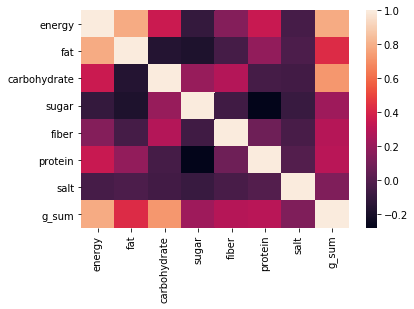

<matplotlib.axes._subplots.AxesSubplot at 0x7f349199b190>

In [0]:
#co-relation variable
cor=temp1.corr()

#heatmap
sns.heatmap(cor)

In [0]:
#filtering with nutritional values
optimum= fsdf[(fsdf['energy']>=900)&(fsdf['carbohydrate']<=210)&(fsdf['fat']<=30)&(fsdf['fat']!=30)&(fsdf['protein']<=50)&(fsdf['protein']!=0)&(fsdf['salt']<=10)&(fsdf['fiber']!=0)]

#sorting by values
optimum=optimum.orderBy(['g_sum','energy'], ascending=False)

In [0]:
optimum.display()

product energy fat carbohydrate sugar fiber protein salt g_sum country Milk chocolate Choco&Nuts 2326.0 0.0 42.0 42.0 4.4 11.8 0.15748 100.0 Russia Kiddylicious Cheesy Straws 2226.0 29.3 62.9 1.8 2.4 2.9 0.98 100.0 France Potato Chips, Spicy Cajun Crawtators 2218.0 28.27 60.07 0.0 3.5 7.07 0.98806 100.0 US Potato Chips, Sweet Onion 2218.0 28.27 60.07 3.53 3.5 3.53 0.89662 100.0 US Florentin Qualité Suisse Biscuits Sans Conservateurs 2211.0 28.0 60.0 0.0 4.5 7.0 0.08 100.0 Switzerland Gourmet Kettle Chips 2201.0 29.82 56.14 1.75 3.5 7.02 1.96088 100.0 US Soufflés Snack's 3D Tokapi Paprika 2192.0 29.7 58.0 2.9 2.9 4.8 2.18 100.0 France Tortilla Chips Blue Maize 2180.0 26.7 62.7 1.5 1.5 6.5 0.8 100.0 France Cornish Sea Salt & West Country Cider Vinegar Crisps 2169.0 28.8 58.6 2.5 2.5 5.1 2.1 100.0 UK Croutons a l'ail 2167.0 28.9 54.3 3.5 3.3 8.5 1.74 100.0 France Croûtons à l'ail 2163.0 28.9 54.3 3.5 3.3 8.5 1.74 100.0 France Palmiers au beurre et au fromage 2160.0 28.0 51.0 1.9 2.7 13.0 3.048 100.0 France Croutons nature 2155.0 29.1 53.5 3.6 3.9 8.1 1.66 100.0 France Patatas fritas lisas "Alipende" Sin sal 2154.0 27.5 55.5 1.0 8.2 7.5 0.0 100.0 Spain Full on flavour - Four cheese & red onion 2145.0 28.9 54.5 2.8 6.0 5.9 1.524 100.0 France,Royaume-Uni FLUTES AU BEURRE TRIO 2144.0 28.0 54.0 3.0 3.0 8.0 4.0 100.0 Switzerland Croustillants fromage 2141.0 28.7 57.5 2.5 4.8 4.8 1.69926 100.0 France Chips Coupe épaisse Saveur oignons caramélisés & vinaigres 2138.0 27.5 57.0 2.0 5.5 6.3 1.3 100.0 France Doritos Tex-Mex 2134.0 26.4 58.9 2.2 3.5 7.5 1.01 100.0 en:ES,France Doritos Triángulos De Maíz Tex - Mex 2134.0 26.4 58.9 2.2 3.5 7.5 1.0 100.0 France Kettle Potato Chips, Dutch Crunch 2130.0 28.07 57.89 1.75 3.5 7.02 1.91516 100.0 US Doritos goût nacho cheese 2125.0 27.0 59.0 2.4 3.0 7.1 1.1 100.0 France Goût Nacho Cheese 2125.0 27.0 59.0 2.4 3.0 7.1 1.1 100.0 France Nacho cheese 2125.0 27.0 59.0 2.4 3.0 7.1 1.1 100.0 Belgique,France Tortillas Roll's goût tomate 2121.0 26.0 60.0 1.8 4.2 6.2 1.6 100.0 France Goût Sour Cream 2117.0 26.0 58.0 3.8 3.1 7.2 1.7 100.0 France Cheetos Goût Cacahuète 2117.0 27.0 53.0 3.6 3.1 11.3 1.69926 100.0 France Cool American Flavour 2117.0 26.0 58.0 3.8 3.1 7.2 1.7 100.0 France Sweet Chilli Pepeers 2109.0 26.0 59.0 3.0 3.0 7.1 2.0 100.0 France Doritos sweet chilli pepper 2107.0 26.0 59.0 3.0 3.0 7.1 2.0 100.0 France Sweet chili pepper 2107.0 26.0 59.0 3.0 3.0 7.1 2.06 100.0 France Croûtons goût fromage spécial soupe 2106.0 25.4 58.8 2.3 2.62 8.6 1.8542 100.0 France Sweet Flour Gorditas 2105.0 20.0 54.29 14.29 2.9 8.57 0.36322 100.0 US Tuiles Hot Dog 2102.0 27.5 58.0 5.0 3.8 4.0 1.2 100.0 France Snatt's : Pain à la tomate et à l'origan 2102.0 25.0 59.0 2.1 4.0 8.0 2.2 100.0 Switzerland Goût Barbecue Style (+10% gratuit) 2097.0 26.0 59.0 3.4 3.1 6.6 1.8 100.0 France Lizis Low Sugar Granola 1KG Value Pack 2096.0 27.1 45.2 3.8 9.7 14.2 0.03 100.0 France Flutes olive 2096.0 27.0 52.0 4.7 3.0 11.0 1.8 100.0 France Hand Cooked Potato Chips Mature Cheddar & Caramelized Onion 2095.0 26.6 57.1 4.5 4.6 6.1 1.30048 100.0 France,Royaume-Uni Stacked Potato Crisps, Bbq 2092.0 26.79 60.71 3.57 3.6 3.57 1.99644 100.0 US Sourdough Hard Pretzel Pieces, Hot Buffalo Wing 2092.0 25.0 60.71 0.0 3.6 7.14 3.44678 100.0 US Takis Fuego, Tortilla Chips, Hot Chili Pepper & Lime 2092.0 26.67 56.67 0.0 6.7 6.67 3.556 100.0 US Tostada Deshidratada 2092.0 17.5 72.5 0.0 2.5 7.5 0.127 100.0 US Roasted Plantain Chips 2092.0 21.43 71.43 0.0 3.6 3.57 0.45466 100.0 US Cheddar Cheese Baked Snack Crackers 2092.0 23.33 60.0 0.0 3.3 10.0 3.21818 100.0 US Organic Blue Corn Taco Shells 2092.0 26.92 57.69 0.0 7.7 7.69 0.0 100.0 US Reduced Fat Ripples Potato Chips, Original 2092.0 23.93 64.29 0.0 3.6 7.14 1.08966 100.0 US Takis, Tortilla Chips, Hot Chili Pepper & Lime 2092.0 26.67 56.67 0.0 6.7 6.67 3.556 100.0 US White Round Tortilla Chips No Salt 2092.0 25.0 64.29 0.0 3.6 7.14 0.0 100.0 US Enjoy Being Good, Avocado Oil, Sea Salt 2092.0 25.0 64.29 0.0

In [0]:
#dataframe of counties ordered by their product values
copt=optimum.groupBy('country').agg(avg('energy'),avg('g_sum'))
copt=copt.orderBy(['avg(g_sum)','avg(energy)'], ascending=[0.0])

#top 10
copt=copt[['country', 'avg(energy)','avg(g_sum)']].head(10)

#converting into a spark dataframe
copt = sqlContext.createDataFrame(copt, ['country', 'avg(energy)','avg(g_sum)'])

In [0]:
copt.display()

country avg(energy) avg(g_sum) Italy,Switzerland 1857.0 100.0 Belgium,Switzerland,United States 2065.0 100.0 Russia 2326.0 100.0 Switzerland,France 1862.0 100.0 Italy,Romania 1857.0 100.0 Spain,France 1628.0 100.0 Mexico 1740.0 100.0 France,Spain 1592.0 100.0 Netherlands,France 1734.0 99.0 Bulgaria,Greece,Hungary,Serbia 1904.0 99.0

In [0]:
#dataframe of products ordered by their values
fopt=optimum.groupBy('product').agg(avg('energy'),avg('g_sum'))
fopt=fopt.orderBy(['avg(g_sum)','avg(energy)'], ascending=[0,0])

#top 10
fopt=fopt[['product', 'avg(energy)','avg(g_sum)']].head(10)

#converting into spark dataframe
fopt = sqlContext.createDataFrame(fopt, ['product', 'avg(energy)','avg(g_sum)'])

In [0]:
fopt.display()

product avg(energy) avg(g_sum) Milk chocolate Choco&Nuts 2326.0 100.0 Kiddylicious Cheesy Straws 2226.0 100.0 Potato Chips, Sweet Onion 2218.0 100.0 Potato Chips, Spicy Cajun Crawtators 2218.0 100.0 Florentin Qualité Suisse Biscuits Sans Conservateurs 2211.0 100.0 Gourmet Kettle Chips 2201.0 100.0 Soufflés Snack's 3D Tokapi Paprika 2192.0 100.0 Tortilla Chips Blue Maize 2180.0 100.0 Cornish Sea Salt & West Country Cider Vinegar Crisps 2169.0 100.0 Croutons a l'ail 2167.0 100.0

In [0]:
#using energy as training label
fsdft=fsdf.withColumnRenamed("energy","label")

#dropping unneeded columns
fsdft=fsdft.drop("product","country")

#selecting required columns
columnst = fsdft.columns

In [0]:
#converting into vectors
assembler= VectorAssembler(inputCols=columnst,outputCol='features')

#scaling values
scaler = StandardScaler(withMean=True, withStd=True, inputCol="features", outputCol="scaled")

#defining pipelne
pipeline=Pipeline(stages=[assembler,scaler])

#applying the pipeline on data
model=pipeline.fit(fsdft)
vdata=model.transform(fsdft)

In [0]:
#80:20 ratio-random
train_sdf,test_sdf=vdata.randomSplit([0.8, 0.2],seed=1033)

In [0]:
#defining model
pca_of_model =  PCA(k=8, inputCol="features", outputCol="pcafeatures")

#training model with training data
train=pca_of_model.fit(train_sdf)

#transforming model on test data
pcaf=train.transform(test_sdf)

In [0]:
#defining model
lr_model = lr()

#fitting model with pca optimized values
lrModel = lr_model.fit(pcaf)

#transforming model on test data
predictions = lrModel.transform(test_sdf)

#summary values
trainingSum = lrModel.summary
test_rmse_pca_model = trainingSum.rootMeanSquaredError

In [0]:
#converting into pandas dataframe
predictions_to_grade = predictions.toPandas()

#printing 200th to 210th predictions and their equivalent labels
answer = [test_rmse_pca_model, predictions_to_grade['prediction'][200:210], predictions_to_grade['label'][200:210], test_rmse_pca_model]
print('check_pca_spark', answer)

check_pca_spark [7.574857791475861e-13, 200 71.0
201 71.0
202 71.0
203 71.0
204 71.0
205 71.0
206 71.0
207 71.0
208 71.0
209 71.0
Name: prediction, dtype: float64, 200 71.0
201 71.0
202 71.0
203 71.0
204 71.0
205 71.0
206 71.0
207 71.0
208 71.0
209 71.0
Name: label, dtype: float64, 7.574857791475861e-13]

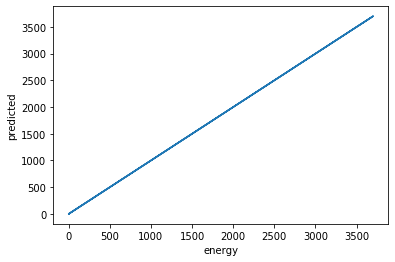

In [0]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('energy')
ax.set_ylabel('predicted')
ax.plot(predictions_to_grade['prediction'], predictions_to_grade['label']);

In [0]:
#defining model with 14 clusters
kmeans = KMeans().setK(14).setSeed(1033).setFeaturesCol("features")

#training model
model = kmeans.fit(train_sdf)

#transforming model
pred = model.transform(test_sdf)

#printing CLusters
print("Cluster Centers: ")
ctr=[]
centers = model.clusterCenters()
for center in centers:
    ctr.append(center)
    print(center)

Cluster Centers: 
[1216.89262496 15.56213442 25.10733774 5.92261674 1.64574773
 11.28242165 1.86122071 61.39619749]
[198.24202558 0.66765351 8.98859907 6.72897784 0.80490046
 1.40193251 0.4333669 19.04113626]
[3.46944101e+03 9.09569418e+01 3.47289314e-01 7.90356212e-02
 1.49635100e-01 2.65682016e-01 7.33049123e-02 9.17567333e+01]
[2.26698753e+03 3.91662638e+01 3.06980765e+01 1.95600201e+00
 2.17869587e+00 1.08158862e+01 1.69434366e+00 8.65251762e+01]
[49.96211466 1.18333363 4.74072966 1.68719022 0.53631409 0.75153765
 5.23671557 14.14499014]
[759.40378292 7.96022818 19.20346095 8.45221299 1.3005162
 7.88417219 1.61421751 46.4215835 ]
[1.99472750e+03 2.88080331e+01 3.74184896e+01 2.62761160e+00
 2.42336976e+00 1.00406028e+01 1.95335217e+00 8.32742333e+01]
[990.43896615 10.98606734 24.26704908 6.56358031 1.54273098
 9.72642952 1.52451122 54.61688025]
[2.60260579e+03 5.41437445e+01 1.01587751e+01 2.42784258e+00
 2.66323253e+00 1.32329640e+01 1.06765618e+00 8.37172489e+01]
[3.01071298e+03 7.54763548e+01 2.32857837e+00 8.10473876e-01
 5.14928311e-01 2.21356501e+00 9.68741052e-01 8.23438639e+01]
[544.0038905 4.86815487 13.50085769 6.70282015 1.02486237
 7.81714272 1.29614532 35.22420263]
[1684.62115592 22.71235308 29.44386568 3.35373799 1.70980862
 15.80256932 1.72775237 74.76647461]
[363.21743703 2.11692636 11.47751016 6.91773117 1.02591626
 5.29775604 0.97103777 27.8180811 ]
[1.47765765e+03 1.16018745e+01 4.74047988e+01 4.28656327e+00
 2.71777613e+00 1.24950311e+01 1.31166268e+00 7.98377383e+01]

In [0]:
pred.display()

label fat carbohydrate sugar fiber protein salt g_sum features scaled prediction 0.0 0.0 0.0 0.0 0.0 0.0 0.00254 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.00254)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.26185172771704956, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.00254 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.00254)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.26185172771704956, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.00254 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.00254)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.26185172771704956, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.00508 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.00508)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.2614459513962704, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.00508 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.00508)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.2614459513962704, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.00508 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.00508)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.2614459513962704, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.00508 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.00508)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.2614459513962704, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.00508 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.00508)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.2614459513962704, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.007112 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.007112)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.2611213303396471, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.00762 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.00762)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.2610401750754912, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.01016 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.01016)) Map(vectorType -> dense, length -> 8, values -> List(-1.2256281718973627, -0.6422147331665341, -0.8923800841260773, -0.7164978956046438, -0.4552678297279295, -0.8439308625675642, -0.26063439875471206, -1.5868111931009994)) 4 0.0 0.0 0.0 0.0 0.0 0.0 0.01524 0.0 Map(vectorType -> sparse, length -> 8, indices -> List(6), values -> List(0.01524)) Map(vecto

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)

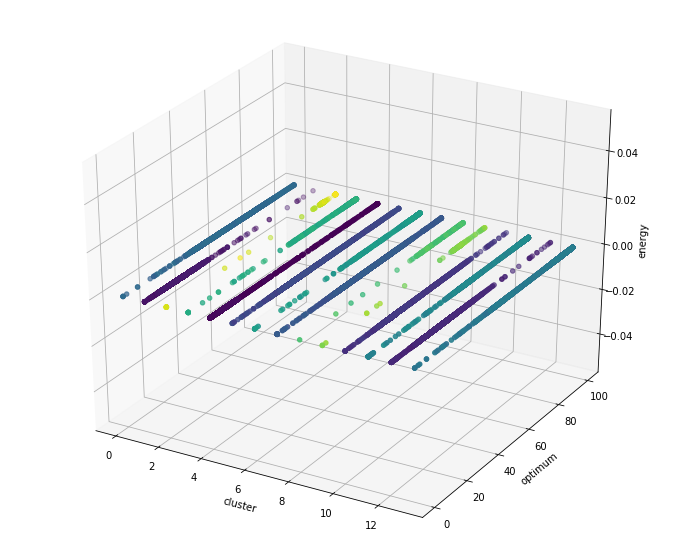

In [0]:
#converting to pandas dataframe
pdpred = pred.toPandas()

#plotting
threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(pdpred.prediction, pdpred.g_sum, c=pdpred.label)
threedee.set_xlabel('cluster')
threedee.set_ylabel('optimum')
threedee.set_zlabel('energy')
plt.show()